---

## Recap



#### What have we learned till now?



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/086/original/Screenshot_2023-07-31_at_10.27.26_AM.png?1690779929 width=700>

- What are Decision Trees?
- How to build Decision Trees?
  - Splitting of nodes
  - Entropy to measure impurity
  - Information Gain

## Issue with Entropy



Do you recall how entropy is calculated?
- $H(y) = - ∑_{i=1}^k p(y_i)log(p(y_i))$


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/087/original/Screenshot_2023-07-31_at_10.27.33_AM.png?1690780005 width=700>


\
So, what's the problem?
- Notice that we take log of probability.
- We have to do this for each feature, at each node.

This is **computationally expensive** and **time consuming**.

\
Do we have any alternatives?
- That's when **Gini Impurity** comes into picture.

---

---

### What is Gini Impurity?

Similar to entropy, Gini is also
- A measure of impurity of nodes.

\
#### But how do we calculate Gini Impurity?


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/088/original/Screenshot_2023-07-31_at_10.27.40_AM.png?1690780045 width=700>

Let's take an example to compare **Entropy vs. Gini Impurity**

\
Suppose you have a binary classification problem.
- $y ~ \epsilon ~ \{red, blue\}$



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/089/original/Screenshot_2023-07-31_at_10.27.49_AM.png?1690780085 width=700>

#### Visualizing Gini Impurity

Desmos plot: https://www.desmos.com/calculator/yhcwubphxs

In [ ]:
from IPython.display import IFrame

IFrame(src="https://www.desmos.com/calculator/yhcwubphxs", width=700, height=375)

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/090/original/Screenshot_2023-07-31_at_10.27.56_AM.png?1690780130 width=700>

```
Quiz 1:

A decision tree model uses Gini impurity as the splitting criterion.
If a node has 60 instances of class A and 40 instances of class B,
what is the Gini impurity at that node?

A. 0.24
B. 0.4
C. 0.6
D. 0.48

Ans: D. 0.48
```
```
Soln:
Gini impurity = 1 - (p(A)^2 + p(B)^2)

p(A) = 60 / 100 = 0.6
p(B) = 40 / 100 = 0.4

Gini impurity = 1 - (0.6^2 + 0.4^2)
= 1 - (0.36 + 0.16)
= 1 - 0.52
= 0.48

Therefore, the Gini impurity at that node is 0.48.
```

#### How do we calculate Information Gain for Gini Impurity?

$IG = GI_{parent~node} - Weighted~GI_{child~nodes}$

### Extra reading material

Functions for calculating...
- Gini impurity
- Weighted gini impurity
- Information Gain using gini impurity

Link: https://colab.research.google.com/drive/1Cf6Bt6sQVYBbvnhtR3cPQENUO4DRGjMP

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/091/original/Screenshot_2023-07-31_at_10.28.04_AM.png?1690780165 width=700>

---

## How to split on numerical features?

I hope you remember that our data contains both,
- Categorical features
- Numerical features

\
We already know that for Categorical feature,
- DT splits data based on distinct categories.

<img src= https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/092/original/Screenshot_2023-07-31_at_10.28.12_AM.png?1690780208 width=700>

#### What happens when we have a Numerical feature?

DT uses a **threshold-based approach**.

  - Consider a numerical feature $f_1$ with $n$ different values.
  - We select a threshold value (say $n_i$) that splits the data into two subsets.
  - This is done on the basis of a condition such as:
    - $f_1 < n_i$
    - $f_1 > n_i$
    - $f_1 = n_i$

\
#### But how do we choose the threshold?

The goal is to find the $threshold+condition$ that gives us **maximum information gain** after splitting.



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/093/original/Screenshot_2023-07-31_at_10.28.20_AM.png?1690780248 width=700>


1. Arrange the values in $f_1$ in increasing order
2. Set each value of $f_1$ i.e. ($n_1$, $n_2$, $n_3$,..) as threshold
3. Calculate the IG of the split for all values

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/094/original/Screenshot_2023-07-31_at_10.28.26_AM.png?1690780348 width=700>


4. Which gives us $n$ IG values say IG$_1$, IG$_2$, IG$_3$ ... IG$_n$
5. Choose whichever threshold gives the highest IG.

#### But what if two features yield equal IG?
  - In such case,
    - We can never know for sure which feature would be the best.
    - So we can randomly select any feature to split the node.

#### Do you see any problem in splitting on numerical features?

\
**Time Complexity**
  - For a feature with 1000 different values,
  - We have to compute 1000 different splits.
  - This is very unefficient.

\


#### How can we make it more efficient?

By binning the feature values.
  - Suppose we have an `Age` column.
    - Range: [20, 60]


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/095/original/Screenshot_2023-07-31_at_10.28.37_AM.png?1690780522 width=700>


  - We can bin the values into `Age Groups`.
    - Bins: [20, 30), [30, 40), [40, 50), [50, 60]

---

## Overfit Vs Underfit


#### Recall in the last lecture we calculated the train & test accuracy for our DT -

- Accuracy -
  - Train: 1.0
  - Test: 0.76


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/096/original/Screenshot_2023-07-31_at_10.28.44_AM.png?1690780545 width=700>

\
#### What can we conclude from this?

- There's a big difference in training & test accuracy.
- It means, the DT model is **overfitting** the data.

\
#### When do you think a DT will **overfit**?

If all the leaf nodes are pure then,
- the DT would have 100% accuracy on training set.

\
#### Why does DT overfit as the depth increases?

Imagine we have 1000 data points.
- as the depth increases, the data set becomes smaller.

By the time we reach the leaf node,
- there will be fewer points.
- these points coule be noise/outliers.

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/097/original/Screenshot_2023-07-31_at_10.28.51_AM.png?1690780598 width=700>








This results in **Overfitting**.



```
Quiz 2:

Which of the following statements is true about overfitting in decision trees?

A. It leads to high bias and high variance.
B. It leads to low bias and high variance.
C. It leads to high bias and low variance.
D. It leads to low bias and low variance.

ANS: B. It leads to low bias and high variance.
```

#### How can we resolve this problem?
  
  - Stop splitting nodes before they become pure.
  - Or in simpler terms, by reducing the **Depth of the DT**.

```
QUIZ 3:

What is pruning in decision trees?

A. The process of removing outliers
B. The process of handling missing values
C. The process removing unnecessary branches
D. process of transforming categorical variables

ANS: C. The process removing unnecessary branches.
```

#### But what if the depth is too low?

\
Typically, we let the tree grow until we get a pure node.

What if we stop the tree growth at a depth=2?














This would mean...
- Lot of -ve points might also fall in that leaf node,
- and they'll be incorrectly classified as +ve.

\
This results in **Underfitting**.

\
If the tree depth is less,
- it means the splits are less.

Hence, **number of hyper-planes dividing the data space are less** </br> i.e., less variance and more bias.

#### Extreme Case

```
QUIZ 4:

What if the tree depth is zero?

It'll mean that the tree has
A. a single node
B. at most 2 nodes
C. at most 3 nodes

ANS: A. a single node

```

**Conclusion:**

- A **deep tree** usually Overfits the training data.
- A **shallow tree** usually Underfits the training data.



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/098/original/Screenshot_2023-07-31_at_10.28.58_AM.png?1690780751 width=700>

### Tradeoff

#### How do we find the right depth of our DT?

Our goal is to -
- not overfit outliers
- not underfit training samples

\
The idea here is to -
- treat **depth** as a hyperparameter
- and find its optimal value.

---

## Hyperparameters

Let's look at various DT hyperparmeters available in the sklearn library.

<img src='https://drive.google.com/uc?id=1z8KTHw3qq0wonrM-zxnSD_Tunh477zLv'>

sklearn DT - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

#### What does each of these hyperparameters do?

\
- **Criterion**:
  - Defines which impurity measure to use.
  - By default, it is set to Gini Impurity.
  
- **max_depth**:
  - Defines maximium depth upto which a tree will grow.
  - By default, it is **None** i.e.
  - it'll grow until all leaves are pure.

- **min_samples_split**:
  - Defines the minimum no. of datapoints required to split further.
  - Helps control depth which therefore prevents **overfit**.
  - By default, it is 2.

- **min_samples_leaf**:
  - Defines the minimum no. of samples a leaf node can have.

- **max_leaf_nodes**:
  - Defines the maximum no. of leaf nodes a tree can have.

- **max_features**:
  - Selects features to be used while deciding the best split.
  - By default, it considers all the features for split.

- **class_weight**:
  - Assign weights to different classes during training.
  - Helps in dealing with imbalanced data.


```
QUIZ 5:
How the performance of a DT will be affected if we tend to increase maximum number of pure leaf nodes?

A. Model will underfit
B. Model will be optimized
C. Model will overfit
D. Can't be sure

ANS: C. Model will overfit
```




#### Tuning the **max_depth** hyperparameter to improve the model performance.

\
We try multiple values of depth.
- Train DTs using various depth values.
- Check the CV error for each value.
- Choose the one which gives lowest CV error.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: /content/preprocessed_X_sm.pickle
100% 534k/534k [00:00<00:00, 120MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: /content/X_test.pickle
100% 111k/111k [00:00<00:00, 107MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: /content/y_sm.pickle
100% 15.4k/15.4k [00:00<00:00, 48.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG
To: /content/y_test.pickle
100% 9.49k/9.49k [00:00<00:00, 25.1MB/s]


In [ ]:
import pickle
# Load data (deserialize)
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('y_sm.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate, cross_val_score

kfold = KFold(n_splits=10)

depths = [3,4,5,67,9,11,13,15]

for depth in depths:
    tree_clf = DecisionTreeClassifier(random_state=7, max_depth=depth)

    cv_acc_results = cross_validate(tree_clf, X_train, y_train, cv = kfold, scoring = 'accuracy', return_train_score = True)

    print(f"K-Fold for depth:{depth} Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print(f"K-Fold for depth: {depth} Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")
    print('***************')

K-Fold for depth:3 Accuracy Mean: Train: 78.23483177413387 Validation: 76.47326674500587
K-Fold for depth: 3 Accuracy Std: Train: 1.203088267164511 Validation: 11.331241420327677
***************
K-Fold for depth:4 Accuracy Mean: Train: 83.50772540936214 Validation: 80.58049353701529
K-Fold for depth: 4 Accuracy Std: Train: 0.7889219949763586 Validation: 6.337951865133366
***************
K-Fold for depth:5 Accuracy Mean: Train: 87.36180052847033 Validation: 81.88366627497062
K-Fold for depth: 5 Accuracy Std: Train: 0.7888615077334944 Validation: 7.73770036081666
***************
K-Fold for depth:67 Accuracy Mean: Train: 100.0 Validation: 83.1316098707403
K-Fold for depth: 67 Accuracy Std: Train: 0.0 Validation: 10.55717457918392
***************
K-Fold for depth:9 Accuracy Mean: Train: 97.31242628012397 Validation: 83.7256169212691
K-Fold for depth: 9 Accuracy Std: Train: 0.3868329573758325 Validation: 10.103313333296661
***************
K-Fold for depth:11 Accuracy Mean: Train: 99.1101215

#### Training with the best parameters -

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=7, max_depth=4)
tree_clf=tree_clf.fit(X_train, y_train)
pred = tree_clf.predict(X_test)

---

## How to **visualize** a DT?

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X_train.columns)

# Ensure the target variable 'Attrition' is not there in the feature list

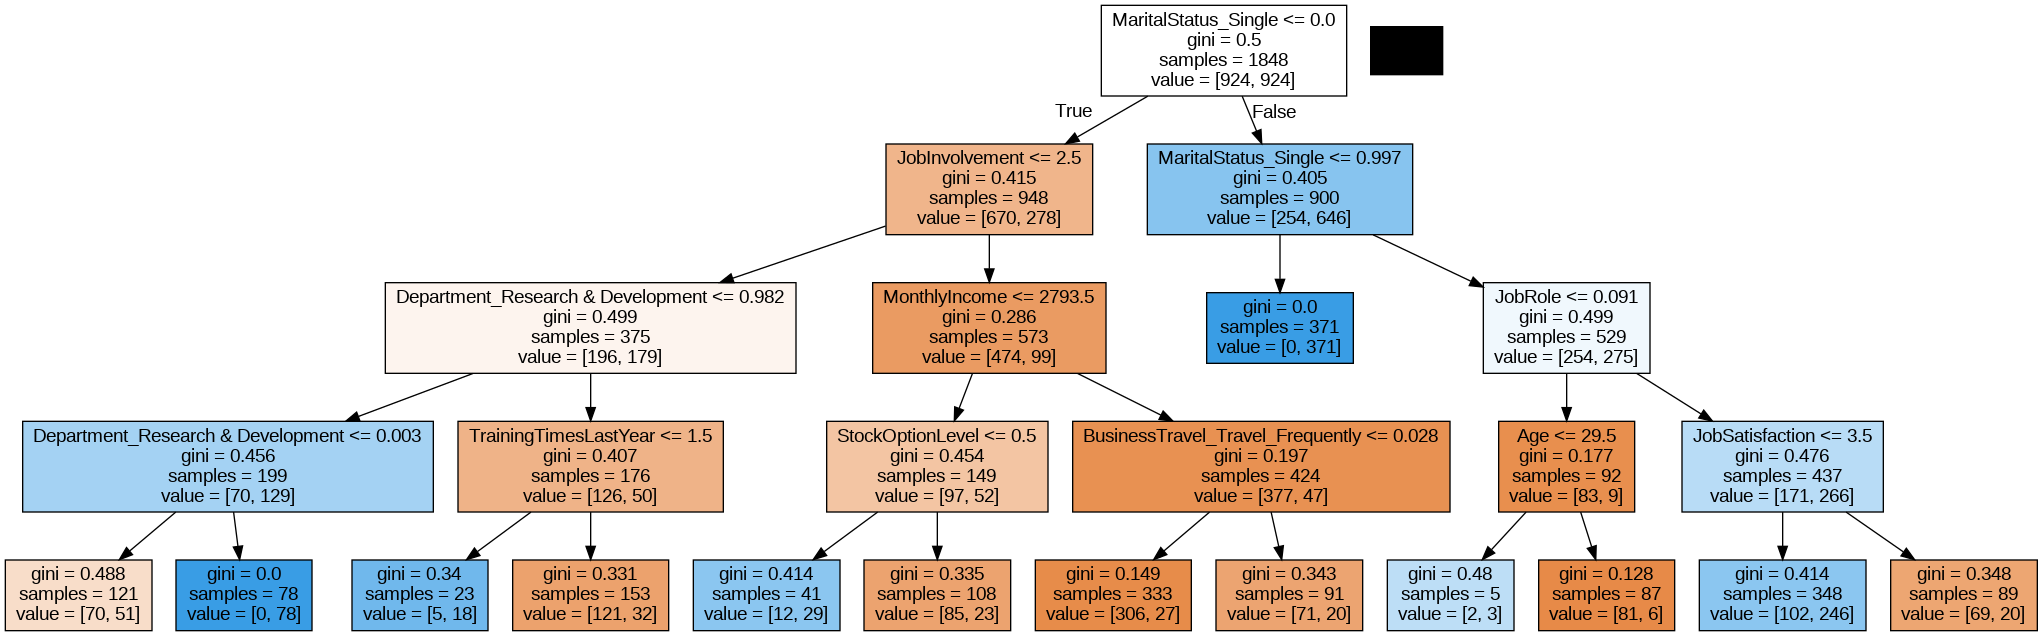

In [ ]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Did you notice the depth of the tree?
- Neither too large
- Nor too low

\
#### What can we infer from this?

If you notice the leaves,
- not all of them are pure.
- This means lesser variance.

### Confusion Matrix

Plotting the confusion matrix for test data -

Recall the **TP**, **TN**, **FN**, **FP** we discussed earlier.


Text(0.5, 23.52222222222222, 'Predicted label')

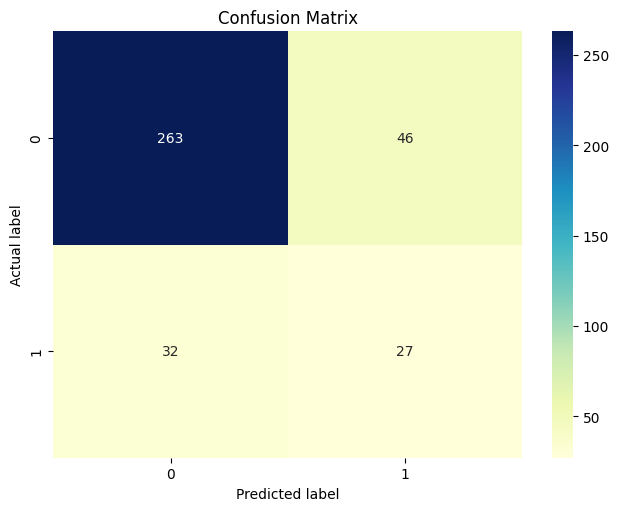

In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, pred)
fig, ax = plt.subplots()

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

What did you notice?

- Model is classifying class 0 quite well.
- However, the number of FN is large.

---

## Impact of Outliers

```
QUIZ 6:

Which of the given DTs will be affected by an outlier?

A. DT with depth=50
B. DT with depth=5
C. Both of them
D. None of them

ANS: DT with depth=50
```

#### But how can we say this?

Because,
- It all depends on the depth of DT.
  - Outliers will only affect DTs with large depth.
  - The DT will overfit on those outlier values.

---

## Feature Scaling

#### Does a DT requires standardised data?
Nope!

- Imagine we have a numerical feature $f_i$\
  and we standardize it.



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/099/original/Screenshot_2023-07-31_at_10.29.09_AM.png?1690780787 width=700>

- But, does Impurity depends on values? \
Nope!
  - it depends on number of +ve/ -ve datapoints
  - and in turn dependend upon the thresold

\
- So standardisation won't change/affect the threshold.
- Hence, standardization doesn't impact the Entropy & IG.

---

## Encoding of categorial features

Suppose we have a feature zipcode, with 10,000 distinct categories.

\
#### What'll happen if we did **no encoding**?

- We'll get 10,000 child nodes,
- data set becomes too small in some nodes,
- eventually the predictions will suffers.
    
Overall, not a good choice.




<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/100/original/Screenshot_2023-07-31_at_10.29.16_AM.png?1690780996 width=700>

\
#### How should we do the encoding then?  

- We can do **target encoding**
  - covert the categories to a numerical value.

- We **should not do one hot encoding**
  * that'll increase the dimensionality of the data.


---

## DT for high dimension data

#### Why shouldn't we use DT for high dimensional data?

If there are lots of features,
- it takes a lot of time to
- check every possible split and compute entropy.

Hence the time to build a DT increases.

\
#### So, what can be done about that?



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/101/original/Screenshot_2023-07-31_at_10.29.27_AM.png?1690781041 width=700>

---

## Data Imbalance in DT

#### How does an imbalanced dataset impacts DT?

\
Since DTs aim to minimize impurity or maximize IG,
- they may prioritize correctly classifying the majority class,
- leading to poor performance on the minority class.

\
#### So, how do we deal with this issue?

- We can rebalance the data by:



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/102/original/Screenshot_2023-07-31_at_10.29.35_AM.png?1690781072 width=700>

---

## Feature Importance

#### How can we find which parameters are contributing more towards a prediction?

- This is where **feature importance** comes into picture.

\
#### How can we get Feature Importance for DT?

Suppose we have 10,000 datapoints at root node.
- A feature $f_i$ is used twice in splitting a DT.
- At first split,
  - No. of data points be 5,000 ($n_1$)
  - Infromation Gain is IG$_1$
- At second split,
  - No. of data points be 500 ($n_2$)
  - Infromation Gain is IG$_2$

\
We calculate feature importance of $f_i$ by


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/103/original/Screenshot_2023-07-31_at_10.29.46_AM.png?1690781118 width=700>

This is called **normalized information gain.**

- We calculate normalized information gain for all features.
- This Normalized IG value is used as feature importances.

\
**NOTE:**
- This is just one of the popular way of calculating feature importance.
- Different libraries may use different methods of calculating it.

#### Code Walkthrough

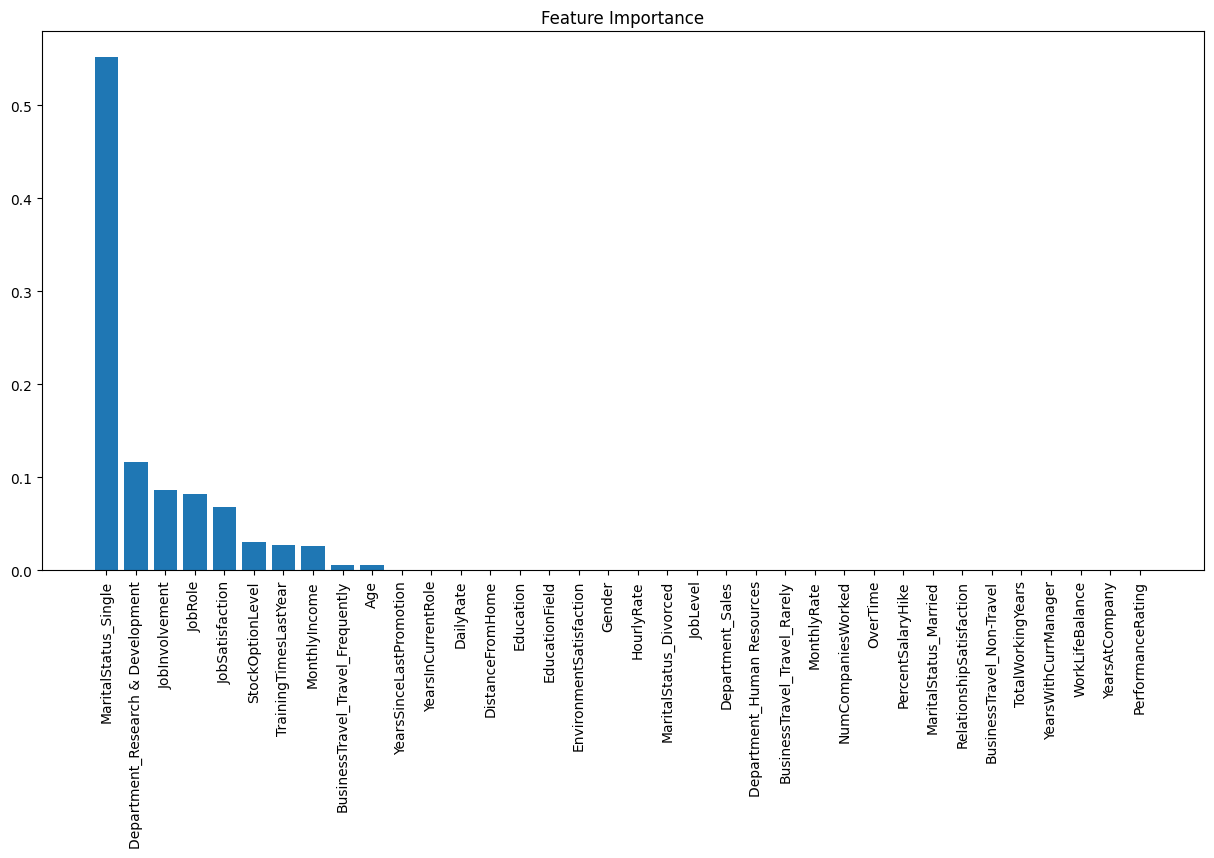

In [ ]:
importances = tree_clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [ ]:
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(len(list(X_train.columns))):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,MaritalStatus_Single,0.551861
1,Department_Research & Development,0.116828
2,JobInvolvement,0.086921
3,JobRole,0.082005
4,JobSatisfaction,0.068126
5,StockOptionLevel,0.030027
6,TrainingTimesLastYear,0.027184
7,MonthlyIncome,0.025852
8,BusinessTravel_Travel_Frequently,0.005684
9,Age,0.005513


#### What can we infer from the above graph?

- `MaritalStatus_Single` is the most important feature.
- Followed by `Department_Research & Development`, `JobInvolvement` and `JobRole`.

---

```
Quiz 7:

Which of the following given statements are correct?

I : DT is supervised algo
II : It can be used for classification
III : It can be used for regression


Options:
A. Statement I
B. Statement I and II
C. Statement I and III
D. All the statements are correct


ANS: D. All the statements are correct
```

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/105/original/Screenshot_2023-07-31_at_10.29.59_AM.png?1690781212 width=700>

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/106/original/Screenshot_2023-07-31_at_10.30.17_AM.png?1690781238 width=700>

## DT Regression

### How do we use DT for regression ?

Let's understand this with an example


Suppose we have data of marks scored by students
- along with some bunch of categorical/ numerical features  ($f_1, f_2, f_3, f_4$)

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/104/original/Screenshot_2023-07-31_at_10.29.53_AM.png?1690781155 width=700>

Using this data, we want to predict the marks.

Remember that,
- in regression problem, target variable (marks) is continuous.



#### So, how does decision tree handle continous target variable ?

In order to so, let's breakdown the process DT follows:
- It calculates the impurity
- Splits the node to reduce the impurity
- Makes the predictions i.e. calculate predicted value

In short, we need to find answers to following questions:

- **How do we calculate impurity in case of regression ?**
- **How do we calculated predicted value at each node ?**

Let's try answering these questions

#### How to calculate impurity ?

**How did we calculate impurity in case of classification?**

We did so by calculating entropy/gini index.


**Can we use the same over here as well?**

- We can't.
    
    **Why?**
    
    coz both of these involve calculating probabilities
    - and regression doesn't have probabilities


**What shall we use instead ?**


Instead, we use **MSE**


Now, in order to calculate MSE, we need two things
- **Actual** target values (we already have these)
- **predicted** target values (we don't have these)


which brings us to our next question

#### How to calculate predicted value ?

```
QUIZ 8:

What do you think DT's approach for calculating predicted value for regression?


A. Majority vote
B. Take mean of all values present at given node.
C. Select random value out of present target values at given node.
D. Takes first present values as predicted value


ANS: B. Take mean of all values present at the given node.
```

Decision Trees makes the prediction by simply
- taking **average of all values present at node**. i.e. mean value.

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/107/original/Screenshot_2023-07-31_at_10.30.24_AM.png?1690781264 width=700>

Let's understand the whole process with an example:

So, at root node we have all the datapoints present

- We calculate the MSE @ root node.

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/108/original/Screenshot_2023-07-31_at_10.30.32_AM.png?1690781312 width=700>

After calculating the predicted value and MSE

Next step is
- we want to **reduce the MSE**
- as we want our prediction to be as close as to actual values


So, in order to do so
- we **split the node**.

We try all the features and
- select one which gives us **maximum reduction in MSE**.


So, we split the root node
- calculate MSE for each child
- combine child entropy using weighted average.

and ultimately calculate **Information gain**

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/109/original/Screenshot_2023-07-31_at_10.30.39_AM.png?1690781352 width=700>

The splitting of nodes continues
- until MSE is minimal
- or based on the hyperparameter tuning.

Let's look into how how we do all this using code

### Sklearn Implementation

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_validate
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
!gdown 176WcJFfaSz3YkO1TiGEg_EqWgJ4YQEwO

Downloading...
From: https://drive.google.com/uc?id=176WcJFfaSz3YkO1TiGEg_EqWgJ4YQEwO
To: /content/regData.csv
100% 13.4k/13.4k [00:00<00:00, 57.3MB/s]


In [4]:
regression_data = pd.read_csv('regData.csv')

In [5]:
regression_data.head()

,X,Y
0,1,1.018138
1,2,0.813685
2,3,0.795484
3,4,0.860005
4,5,0.990648


In [6]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       600 non-null    int64  
 1   Y       600 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 9.5 KB


There are total of 600 datapoints

In [7]:
X = regression_data['X']
y = regression_data['Y']

#### Plotting data

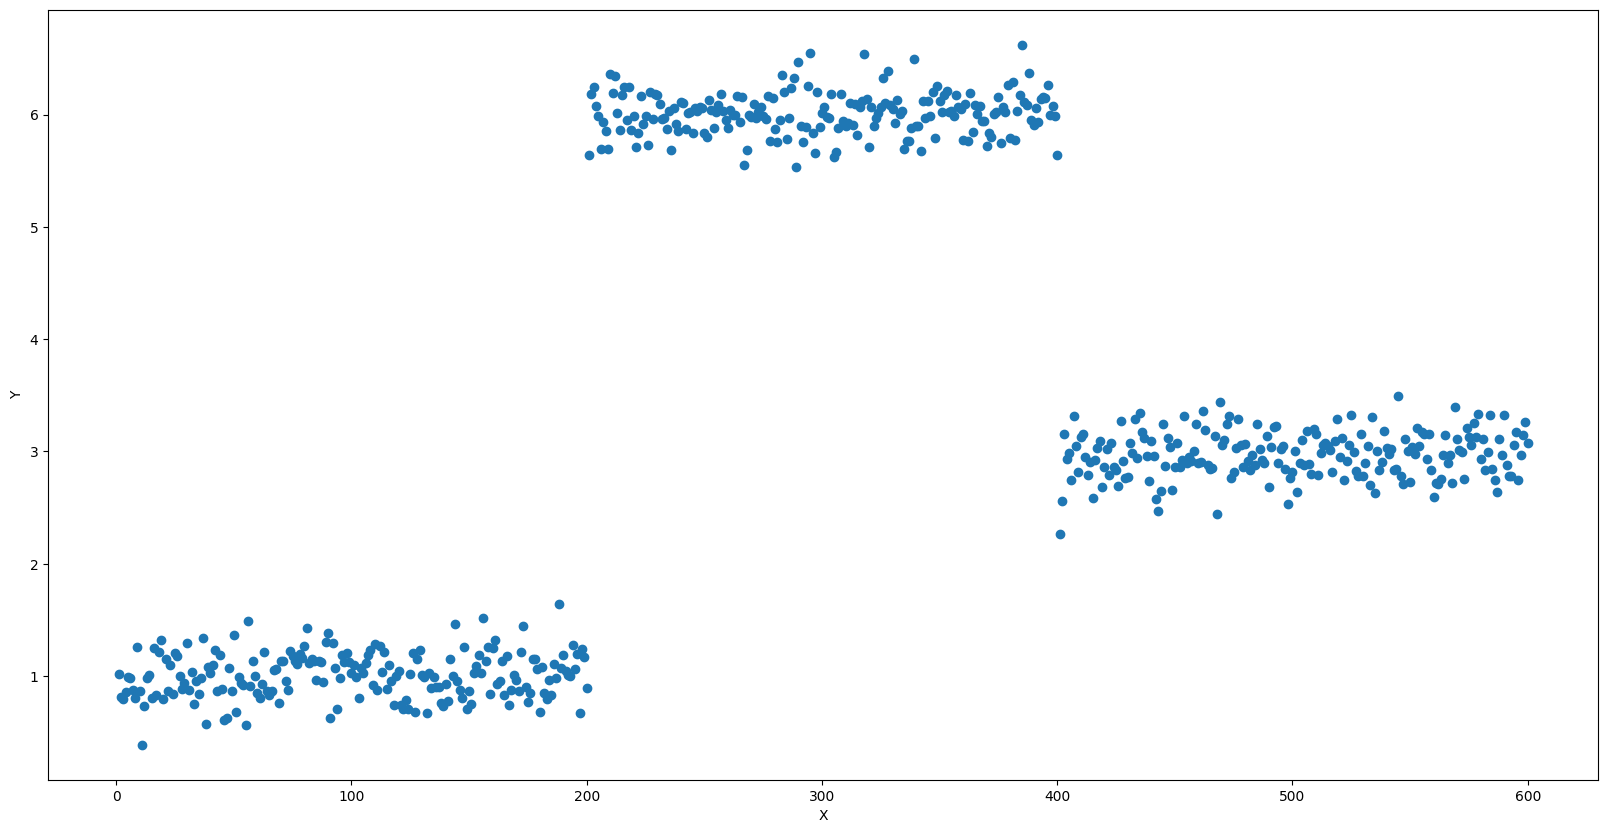

In [8]:
plt.figure(figsize = (20,10))
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Notice that,
- simple linear regression will fail to fit a line on this type of data.

#### Splitting data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=43,
                                                    shuffle = True)

In [10]:
X_train = X_train.values.reshape(-1,1)

In [11]:
y_train = y_train.values

In [12]:
depths = [1,2,3,5,6,7,9,11]

for depth in depths:
    tree_reg = DecisionTreeRegressor(random_state=7, max_depth = depth, min_samples_split = 10, min_samples_leaf = 20)

    kfold = KFold(n_splits=3)

    # scoring is taken as negative mse as we maximize the scoring. maximizing negative MSE is same as minimizing MSE.
    cv_acc_results = cross_validate(tree_reg, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error', return_train_score = True)

    print(f"K-Fold for depth:{depth} -ve MSE Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print('***************')

K-Fold for depth:1 -ve MSE Mean: Train: -157.29484407813618 Validation: -161.85220982964185
***************
K-Fold for depth:2 -ve MSE Mean: Train: -4.022779524301007 Validation: -13.41631105078697
***************
K-Fold for depth:3 -ve MSE Mean: Train: -3.889896491712604 Validation: -13.530023054703413
***************
K-Fold for depth:5 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:6 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:7 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:9 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:11 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************




Notice, the regressor is overfitting.
- This could be bcoz we have very less datapoints for training.
- We can also try tuning the hyperparameters.



#### Visualizing Decision Tree

In [13]:
features = list(regression_data.columns[0])

In [14]:
tree_reg = DecisionTreeRegressor(random_state=7, max_depth = 2, min_samples_split = 20 )
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, min_samples_split=20, random_state=7)

In [15]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

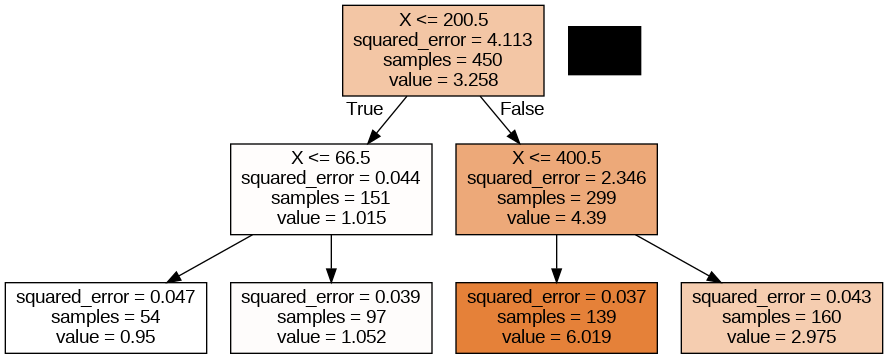

In [16]:
dot_data = StringIO()
export_graphviz(tree_reg, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

#### Visualizing Regression Line

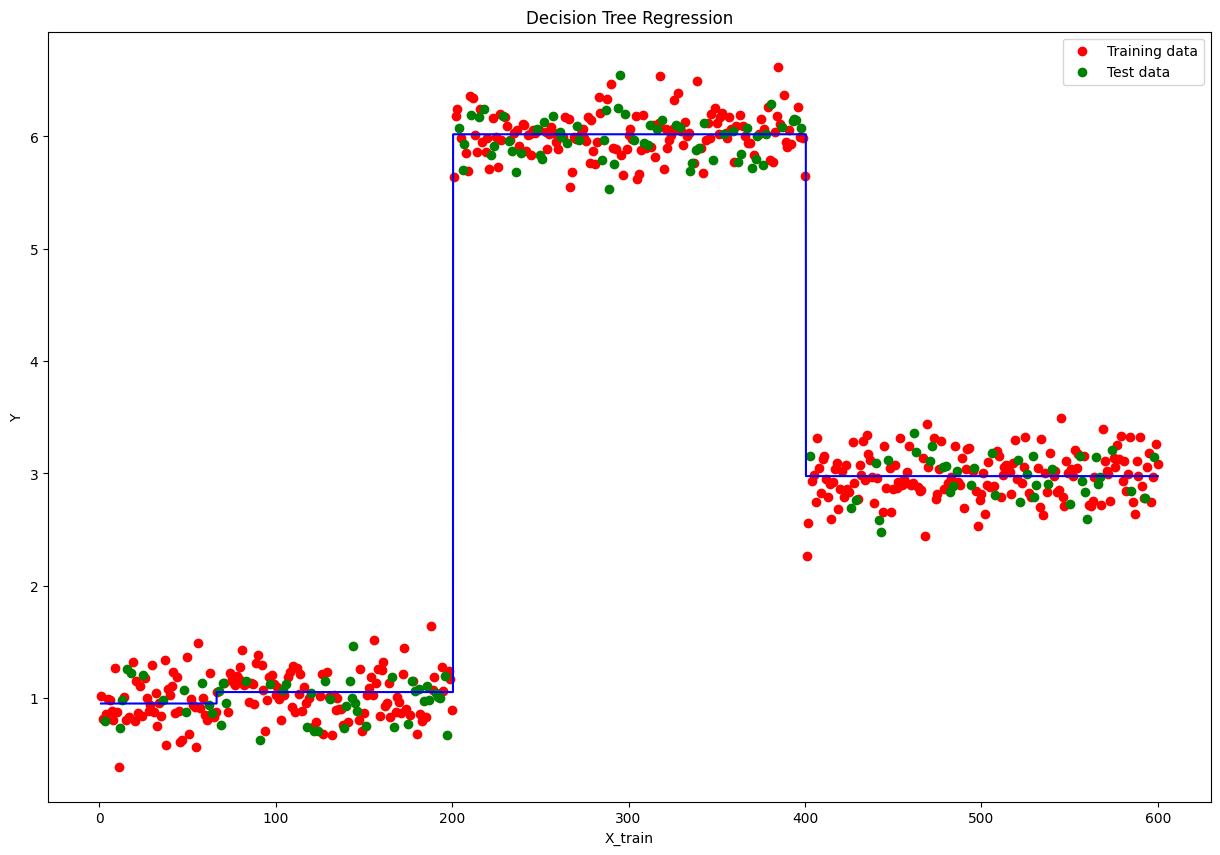

In [17]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize = (15,10))
plt.scatter(X_train, y_train, color = 'red', label = 'Training data')
plt.scatter (X_test, y_test, color = 'green', label = 'Test data')
plt.plot(X_grid, tree_reg.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('X_train')
plt.ylabel('Y')
plt.legend()
plt.show()

### Extra reading material

**Scratch implementation for calculating split threshold for numerical feature**

Link: https://colab.research.google.com/drive/1glFYa9-vHNDBHUysQj45ioAg8x6m9_B2?usp=sharing

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/110/original/Screenshot_2023-07-31_at_10.30.46_AM.png?1690781396 width=700>

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/041/111/original/Screenshot_2023-07-31_at_10.30.53_AM.png?1690781423 width=700>